# Conjunto de dados para classificação da qualidade de vinho

## Definição do Problema

O conjunto de dados da qualidade de vinho consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho.

Trata-se de um problema de classificação multi-classe, mas pode ser também formulado como um problema de regressão. O número de observações para cada classe não é balanceado. Existem 4,898 observações com 11 variáveis de entrada e uma variável de saída. Os nomes das variáveis são as seguintes:

1. Acidez fixa.
2. Acidez volátil.
3. Ácido cítrico.
4. Resíduos de açúcar.
5. Cloretos.
6. Dióxido de enxofre livre.
7. Dióxido de enxofre total.
8. Densidade.
9. pH.
10. Sulfatos.
11. Ácool.
12. Qualidade (nota entre 0 e 10).

Atributo de predição: Classe da qualidade de vinho

### Importação das bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

### Carregando e definindo as colunas do dataset

In [13]:
columns = ["acidez fixa","acidez volatil","acido citrico",
           "acucar residual","cloretos","dioxido de enxofre livre",
           "dioxido de enxofre total","densidade","pH","sulfatos","alcool","qualidade"]
data = pd.read_csv('wine-quality-dataset.csv',names=columns, sep=';')

### Visualização e descrição dos dados

In [14]:
data.head(10)

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
data.describe()

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
print(data.shape)

(4898, 12)


In [10]:
print(data.groupby('qualidade').size())

qualidade
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


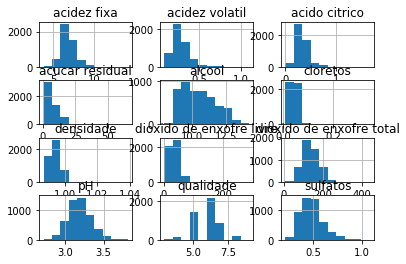

In [11]:
data.hist();

In [12]:
data.corr()

,acidez fixa,acidez volatil,acido citrico,acucar residual,cloretos,dioxido de enxofre livre,dioxido de enxofre total,densidade,pH,sulfatos,alcool,qualidade
acidez fixa,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
acidez volatil,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
acido citrico,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
acucar residual,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
cloretos,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
dioxido de enxofre livre,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
dioxido de enxofre total,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
densidade,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulfatos,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Criação do dataset de validação 

In [15]:
dataset = data.values
print(dataset)

[[  7.     0.27   0.36 ...,   0.45   8.8    6.  ]
 [  6.3    0.3    0.34 ...,   0.49   9.5    6.  ]
 [  8.1    0.28   0.4  ...,   0.44  10.1    6.  ]
 ..., 
 [  6.5    0.24   0.19 ...,   0.46   9.4    6.  ]
 [  5.5    0.29   0.3  ...,   0.38  12.8    7.  ]
 [  6.     0.21   0.38 ...,   0.32  11.8    6.  ]]


In [17]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[  6.7 ,   0.62,   0.24, ...,   0.32,  10.4 ,   5.  ],
       [  6.9 ,   0.19,   0.49, ...,   0.27,  11.5 ,   6.  ],
       [  7.7 ,   0.42,   0.38, ...,   0.58,  11.  ,   6.  ],
       ..., 
       [  7.5 ,   0.23,   0.32, ...,   0.56,   9.7 ,   6.  ],
       [  8.3 ,   0.33,   0.42, ...,   0.32,  12.4 ,   3.  ],
       [  6.6 ,   0.32,   0.34, ...,   0.48,   9.7 ,   6.  ]])

In [18]:
X = dataset[:,:11]
y = dataset[:,11]

In [19]:
n_train = int(round(len(y) * 0.75))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [20]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4898, 11), (4898,), (3674, 11), (3674,), (1224, 11), (1224,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [22]:
model_decisiontree = tree.DecisionTreeClassifier()
model_svc = svm.SVC()
model_knn = neighbors.KNeighborsClassifier()
model_logisticregression = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
model_naivebayes = naive_bayes.GaussianNB()
model_sgdclassifier = linear_model.SGDClassifier()
model_randomforest = ensemble.RandomForestClassifier()
model_gradientboosting = ensemble.GradientBoostingClassifier()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [23]:
model_decisiontree.fit(X_train,y_train)
model_svc.fit(X_train,y_train)
model_knn.fit(X_train,y_train)
model_logisticregression.fit(X_train,y_train)
model_naivebayes.fit(X_train,y_train)
model_sgdclassifier.fit(X_train,y_train)
model_randomforest.fit(X_train,y_train)
model_gradientboosting.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
pred_decisiontree = model_decisiontree.predict(X_test)
pred_svc = model_svc.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_logisticregression = model_logisticregression.predict(X_test)
pred_naivebayes = model_naivebayes.predict(X_test)
pred_sgdclassifier = model_sgdclassifier.predict(X_test)
pred_randomforest = model_randomforest.predict(X_test)
pred_gradientboosting = model_gradientboosting.predict(X_test)

### Resultados

#### DecisionTreeClassifier

In [25]:
print(metrics.classification_report(y_test, pred_decisiontree))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.26      0.28      0.27        39
        5.0       0.62      0.61      0.61       364
        6.0       0.63      0.61      0.62       550
        7.0       0.53      0.56      0.54       221
        8.0       0.29      0.49      0.36        37
        9.0       0.00      0.00      0.00         2

avg / total       0.58      0.58      0.58      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
dtc = metrics.accuracy_score(y_test, pred_decisiontree)
print(dtc)

0.579248366013


#### C-Support Vector Classification (SVC)

In [27]:
print(metrics.classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.50      0.03      0.05        39
        5.0       0.60      0.45      0.52       364
        6.0       0.54      0.80      0.65       550
        7.0       0.59      0.35      0.44       221
        8.0       0.83      0.14      0.23        37
        9.0       0.00      0.00      0.00         2

avg / total       0.57      0.56      0.53      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
svc = metrics.accuracy_score(y_test, pred_svc)
print(svc)

0.562091503268


#### KNeighborsClassifier (KNN)

In [29]:
print(metrics.classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.13      0.10      0.12        39
        5.0       0.45      0.51      0.48       364
        6.0       0.53      0.60      0.56       550
        7.0       0.48      0.33      0.39       221
        8.0       0.18      0.05      0.08        37
        9.0       0.00      0.00      0.00         2

avg / total       0.47      0.49      0.47      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
knn = metrics.accuracy_score(y_test, pred_knn)
print(knn)

0.486111111111


#### LogisticRegression

In [31]:
print(metrics.classification_report(y_test, pred_logisticregression))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.00      0.00      0.00        39
        5.0       0.57      0.53      0.55       364
        6.0       0.53      0.75      0.62       550
        7.0       0.45      0.20      0.28       221
        8.0       0.00      0.00      0.00        37
        9.0       0.00      0.00      0.00         2

avg / total       0.49      0.53      0.49      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
lr = metrics.accuracy_score(y_test, pred_logisticregression)
print(lr)

0.531045751634


#### GaussianNB

In [33]:
print(metrics.classification_report(y_test, pred_naivebayes))

             precision    recall  f1-score   support

        3.0       0.29      0.18      0.22        11
        4.0       0.29      0.33      0.31        39
        5.0       0.48      0.51      0.49       364
        6.0       0.48      0.32      0.39       550
        7.0       0.34      0.65      0.45       221
        8.0       0.38      0.08      0.13        37
        9.0       0.00      0.00      0.00         2

avg / total       0.45      0.43      0.42      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
nb = metrics.accuracy_score(y_test, pred_naivebayes)
print(nb)

0.426470588235


#### SGDClassifier

In [35]:
print(metrics.classification_report(y_test, pred_sgdclassifier))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.00      0.00      0.00        39
        5.0       0.00      0.00      0.00       364
        6.0       0.45      1.00      0.62       550
        7.0       0.00      0.00      0.00       221
        8.0       0.00      0.00      0.00        37
        9.0       0.00      0.00      0.00         2

avg / total       0.20      0.45      0.28      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
sgd = metrics.accuracy_score(y_test, pred_sgdclassifier)
print(sgd)

0.449346405229


#### RandomForestClassifier

In [37]:
print(metrics.classification_report(y_test, pred_randomforest))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.67      0.26      0.37        39
        5.0       0.67      0.72      0.70       364
        6.0       0.65      0.75      0.70       550
        7.0       0.65      0.50      0.57       221
        8.0       0.76      0.43      0.55        37
        9.0       0.00      0.00      0.00         2

avg / total       0.66      0.66      0.65      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
rf = metrics.accuracy_score(y_test, pred_randomforest)
print(rf)

0.662581699346


#### GradientBoostingClassifier

In [40]:
print(metrics.classification_report(y_test, pred_gradientboosting))

             precision    recall  f1-score   support

        3.0       0.00      0.00      0.00        11
        4.0       0.27      0.18      0.22        39
        5.0       0.60      0.53      0.56       364
        6.0       0.56      0.73      0.63       550
        7.0       0.55      0.34      0.42       221
        8.0       0.57      0.11      0.18        37
        9.0       0.00      0.00      0.00         2

avg / total       0.55      0.56      0.54      1224



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
gb = metrics.accuracy_score(y_test, pred_gradientboosting)
print(gb)

0.557189542484


### Comparando os resultados

In [42]:
class_names = ['DTC','SVC','KNN','LR','NB','SGD','RF','GB']
class_ = [dtc,svc,knn,lr,nb,sgd,rf,gb]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

DTC: 0.579248366013
SVC: 0.562091503268
KNN: 0.486111111111
LR: 0.531045751634
NB: 0.426470588235
SGD: 0.449346405229
RF: 0.662581699346
GB: 0.557189542484


([<matplotlib.axis.XTick at 0x109092358>,
 <a list of 8 Text xticklabel objects>)

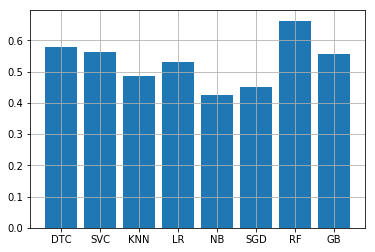

In [49]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names)